In [2]:
# Step a: Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
import matplotlib.pyplot as plt
import numpy as np


In [3]:
# Step a: Load the CIFAR-10 dataset (has 'plant-like' images such as trees)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Step a: Preprocess data
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0
y_train = y_train.flatten()
y_test = y_test.flatten()

# Step a: Label categories (CIFAR-10 includes natural/plant categories like 'deer', 'frog', 'bird', etc.)
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

In [4]:
# Step b: Define the CNN model with hyperparameter tuning
model = models.Sequential()

# Step b: Layer 1 - Conv2D with filter size 3x3, 32 filters
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

# Step b: Layer 2 - MaxPooling to reduce spatial dimensions
model.add(layers.MaxPooling2D((2, 2)))

# Step b: Layer 3 - Conv2D with 64 filters
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Step b: Layer 4 - MaxPooling again
model.add(layers.MaxPooling2D((2, 2)))

# Step b: Layer 5 - Dropout to prevent overfitting
model.add(layers.Dropout(0.25))

# Step b: Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))

# Step b: Dropout for regularization
model.add(layers.Dropout(0.5))

# Step b: Output layer with 10 classes
model.add(layers.Dense(10, activation='softmax'))

# Step b: Compile model with chosen optimizer and learning rate
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Step b: Train the model
history = model.fit(x_train, y_train, epochs=5, batch_size=64, 
                    validation_data=(x_test, y_test))

C:\Users\91862\anaconda3\lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 100s 120ms/step - accuracy: 0.2890 - loss: 1.9182 - val_accuracy: 0.4960 - val_loss: 1.3921
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 64s 81ms/step - accuracy: 0.4828 - loss: 1.4394 - val_accuracy: 0.5737 - val_loss: 1.1849
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 75s 95ms/step - accuracy: 0.5407 - loss: 1.2873 - val_accuracy: 0.5926 - val_loss: 1.1663
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 92s 117ms/step - accuracy: 0.5718 - loss: 1.2156 - val_accuracy: 0.6316 - val_loss: 1.0560
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 109s 139ms/step - accuracy: 0.5948 - loss: 1.1465 - val_accuracy: 0.6599 - val_loss: 0.9772


313/313 ━━━━━━━━━━━━━━━━━━━━ 10s 32ms/step - accuracy: 0.6596 - loss: 0.9691

Test Accuracy: 0.6599
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 347ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 142ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 121ms/step


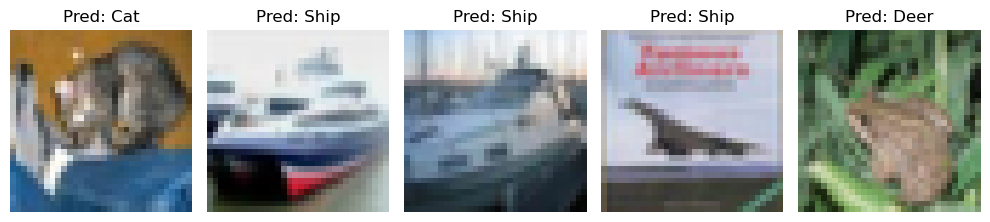

In [5]:
# Step b: Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"\nTest Accuracy: {test_acc:.4f}")

# Step b: Display sample predictions
plt.figure(figsize=(10, 5))
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(x_test[i])
    plt.title(f"Pred: {class_names[np.argmax(model.predict(x_test[i:i+1]))]}")
    plt.axis('off')
plt.tight_layout()
plt.show()